In [1]:
from pulsee.simulation import *
from pulsee.plot import *
from pulsee.pulses import Pulses

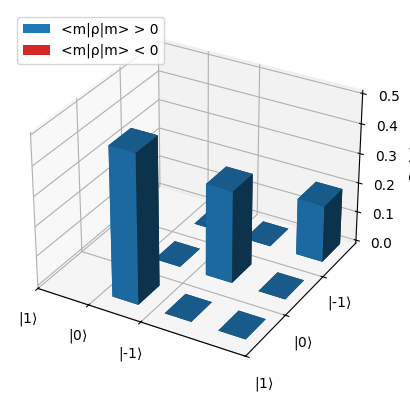

In [2]:
spin_par = {"quantum number": 1.0, "gamma/2pi": 1.0}

zeem_par = {"field magnitude": 1.0, "theta_z": 0.0, "phi_z": 0.0}

spin, h_unperturbed, dm_0 = nuclear_system_setup(
    spin_par=spin_par,
    quad_par=None,
    zeem_par=zeem_par,
    initial_state="canonical",
    temperature=1e-4,
)
fig = plot_real_part_density_matrix(dm_0)

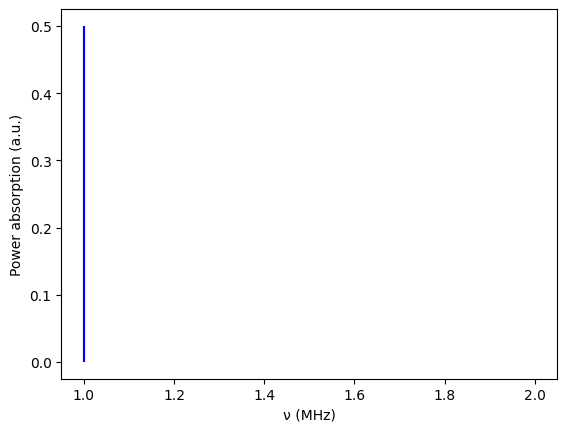

In [3]:
f, p = power_absorption_spectrum(spin, h_unperturbed, normalized=True)
_ = plot_power_absorption_spectrum(f, p)

In [4]:
pulse_time = 1 / (np.sqrt(2) * 4 * 0.2)
mode = Pulses(
    frequencies=[2 * np.pi],
    amplitudes=[0.2],
    phases=[0],
    theta_p=[np.pi / 2],
    phi_p=[0],
    pulse_times=[pulse_time],
)

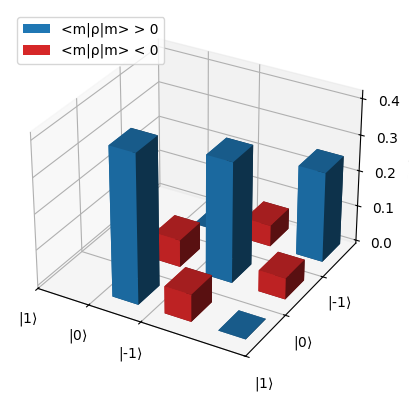

In [5]:
dm_evolved = evolve(
    spin, h_unperturbed, dm_0, solver=magnus, mode=mode, picture="IP", n_points=1000
)

fig = plot_real_part_density_matrix(dm_evolved)

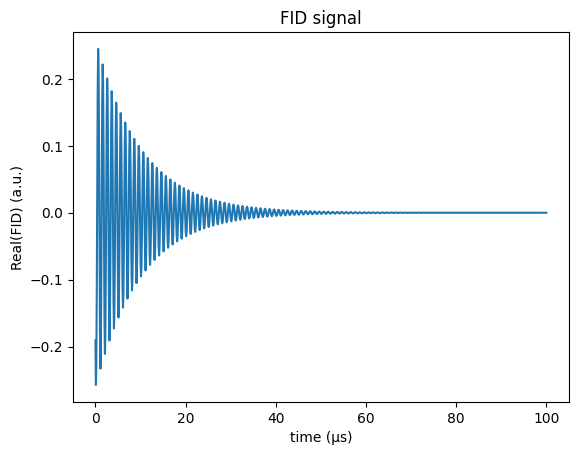

In [6]:
t, fid = FID_signal(
    spin, h_unperturbed, dm_evolved, acquisition_time=100, T2=10, n_points=1000
)

_ = plot_real_part_FID_signal(t, fid)

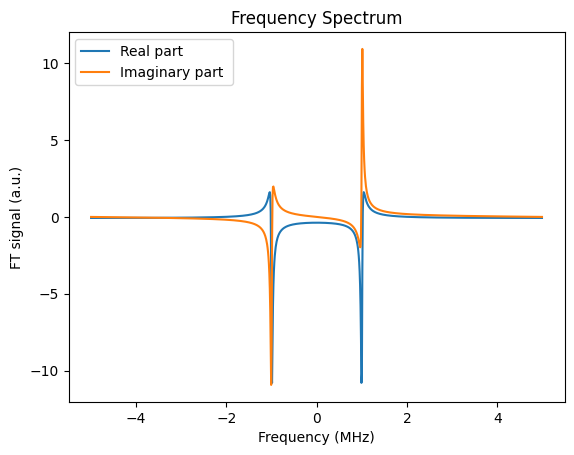

In [7]:
f, ft = fourier_transform_signal(fid, t)

fig, ax = plot_fourier_transform(f, ft, square_modulus=False, norm=False)

In [8]:
quad_par = {
    "coupling constant": 0.2,
    "asymmetry parameter": 0.0,
    "alpha_q": 0.0,
    "beta_q": 0.0,
    "gamma_q": 0.0,
    "order": 0,
}

spin, h_unperturbed, dm_0 = nuclear_system_setup(
    spin_par=spin_par,
    quad_par=quad_par,
    zeem_par=zeem_par,
    initial_state="canonical",
    temperature=1e-4,
)

In [9]:
dm_evolved = evolve(
    spin, h_unperturbed, dm_0, solver=magnus, mode=mode, picture="IP", n_points=1000
)

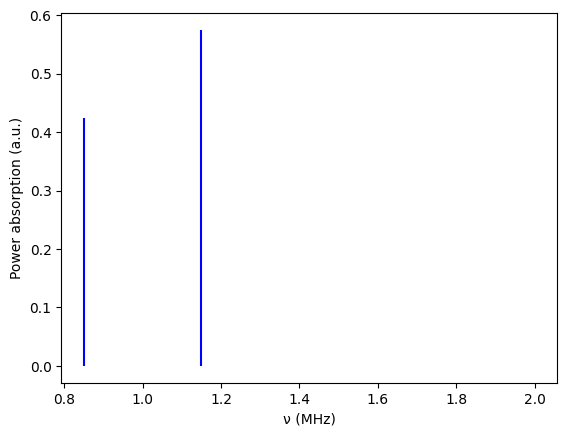

In [10]:
f, p = power_absorption_spectrum(spin, h_unperturbed, normalized=True)
_ = plot_power_absorption_spectrum(f, p)

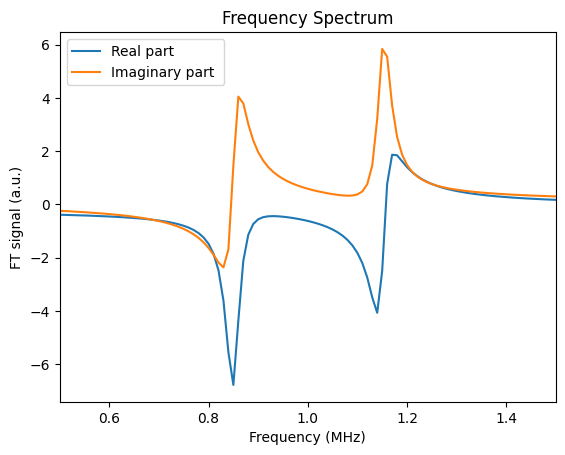

In [11]:
t, fid = FID_signal(
    spin, h_unperturbed, dm_evolved, acquisition_time=100, T2=10, n_points=1000
)
f, ft = fourier_transform_signal(fid, t)
fig = plot_fourier_transform(f, ft, square_modulus=False, norm=False, xlim=(0.5, 1.5))

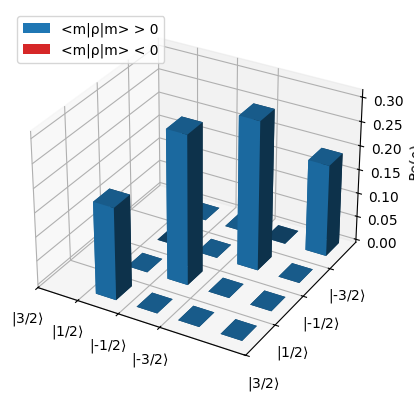

In [12]:
spin_par = {"quantum number": 3 / 2, "gamma/2pi": 1.0}

quad_par = {
    "coupling constant": 2.0,
    "asymmetry parameter": 0.0,
    "alpha_q": 0.0,
    "beta_q": 0.0,
    "gamma_q": 0.0,
    "order": 0.0,
}

spin, h_unperturbed, dm_0 = nuclear_system_setup(
    spin_par=spin_par,
    quad_par=quad_par,
    zeem_par=None,
    initial_state="canonical",
    temperature=1e-4,
)
fig = plot_real_part_density_matrix(dm_0)

In [13]:
pulse_time = 1 / (np.sqrt(2) * 4 * 0.2)
mode = Pulses(
    frequencies=[2 * np.pi],
    amplitudes=[0.2],
    phases=[0],
    theta_p=[np.pi / 2],
    phi_p=[0],
    pulse_times=[pulse_time],
)

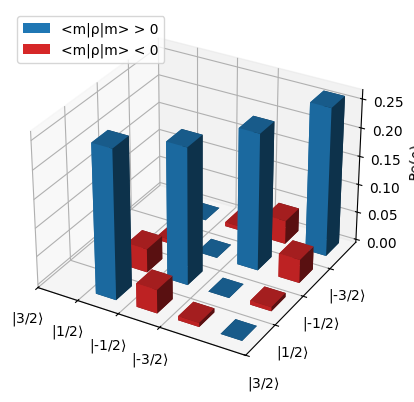

In [14]:
dm_evolved = evolve(
    spin, h_unperturbed, dm_0, solver=magnus, mode=mode, picture="IP", n_points=1000
)
fig = plot_real_part_density_matrix(dm_evolved)

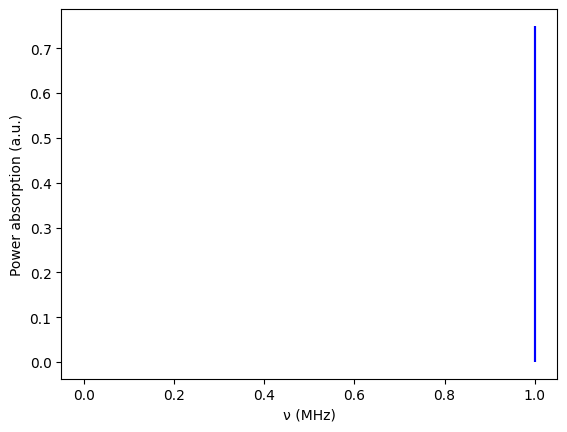

In [15]:
f, p = power_absorption_spectrum(spin, h_unperturbed, normalized=True)
_ = plot_power_absorption_spectrum(f, p)

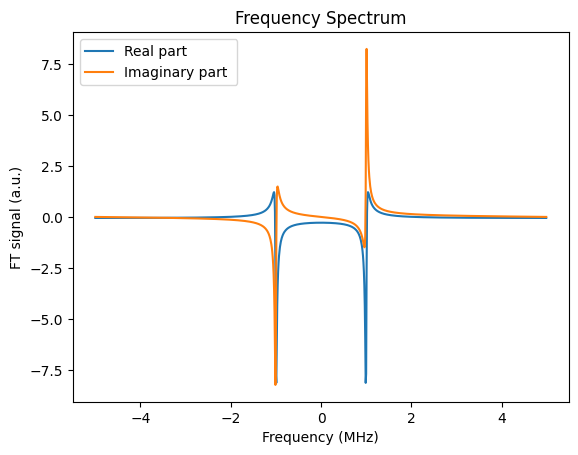

In [16]:
t, fid = FID_signal(
    spin, h_unperturbed, dm_evolved, acquisition_time=100, T2=10, n_points=1000
)
f, ft = fourier_transform_signal(fid, t)

fig = plot_fourier_transform(f, ft, norm=False)